# DATA REDUCTION PIPELINE
In summer 2023, I spent 2 months in Argentina observing distant galaxies in the Zone of Avoidance. This section of the sky is heavily obscured by gas and dust from the milkyway bulge and has made it very difficult to conduct extragalactic research in that part of the sky. This program is for the data reduction of the first night of data taken at the remote Cesco observatory in the Andes mountain range.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 

In [46]:
def load_fits(img):
    """
    this function loads fits data and reads the data from the header
    """
    hdu = fits.open(img)
    data = hdu[0].data
    return data

In [61]:
def eazy_loader(string1, string2, Range):
    """
    this function loads N fits files into a list
    """
    def load_fits(img):
        """
        this function loads fits data and reads the data from the header
        """
        hdu = fits.open(img)
        data = hdu[0].data
        return data
    
    image_list = []
    Range += 1
    for i in range(1, Range):
        if i < 10:
            data = load_fits(string1.format(i))
            image_list.append(data)
        else:
            data = load_fits(string2.format(i))
            image_list.append(data)
    return image_list

In [62]:
def imshow(image):
    """
    this function imshows fits data with proper astronomical settings
    """
    fig, axs = plt.subplots(1, 2, figsize = (10,5))
    fig.tight_layout()
    axs[0].imshow(image, vmin = np.percentile(image, 1), vmax = np.percentile(image, 95), cmap = 'gray', 
               origin = 'lower')
    axs[1].hist(image.flatten(), log = True, histtype = 'step', bins = 20, color = 'mediumslateblue', lw = 2)
    axs[1].vlines(np.mean(image), 0, np.sum(image), ls = '--', color = 'black', lw = 1)

In [63]:
def reduce(raw_list, darks, flats):
    """
    this function reduces each science image given a master dark and flat frame
    """
    # create dark subtracted list for storage
    dark_sub = []
    for i in raw_list:
        # subtract master dark and store dark-subtracted light frame
        subtracted = i - darks
        dark_sub.append(subtracted)
    
    # divide by master flat for each dark-subtracted science
    normal_sci = []
    for i in dark_sub:
        norm = i / flats
        normal_sci.append(norm)
    
    return normal_sci

In [64]:
# calibration frames
#######
# darks
#######
raw_darks = eazy_loader('dark/Dark-00{}_14_.fit', 'dark/Dark-0{}_14_.fit', 10)
master_dark = np.median(raw_darks, axis = 0)

######
# bias
######
raw_bias = eazy_loader('bias/Bias-00{}_14_.fit', 'bias/Bias-0{}_14_.fit', 10)
master_bias = np.median(raw_bias, axis = 0)

#######
# flats
#######
raw_flats = eazy_loader('flat/Flat-00{}_14_.fit', 'flat/Flat-0{}_14_.fit', 10)
flat_bias = []
for i in raw_flats:
    sub = i - master_bias
    flat_bias.append(sub)
# median combine flats
median_flat = np.median(flat_bias, axis = 0)
# normalize master flat
master_flat = median_flat/np.mean(median_flat)
# check if flat is normalized
fig = plt.figure(figsize = (3,3))
a,_,_ = plt.hist(master_flat.flatten(), color = 'mediumslateblue', log = True, histtype = 'step', bins = 50)

FileNotFoundError: [Errno 2] No such file or directory: 'dark/Dark-001_14_.fit'

In [13]:
#########
# group 1
#########
data = load_fits('group1/515679688554_Jul01.fit')
raw_science1 = eazy_loader('group1/515679688554-00{}_14_.fit', 'group1/515679688554-0{}_14_.fit', 12)
raw_science1.insert(0, data)

In [14]:
# reduce group 1
normal_sci1 = reduce(raw_science1, master_dark, master_flat)

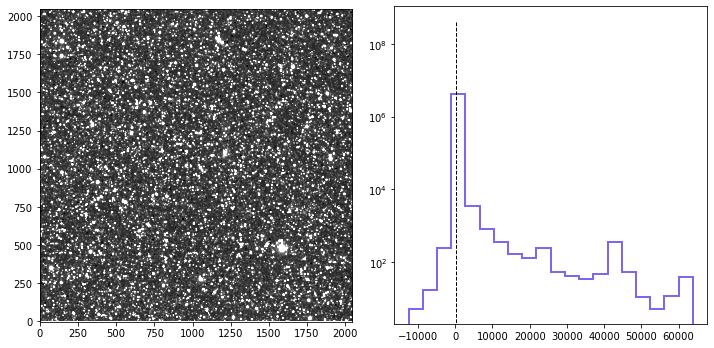

In [15]:
imshow(normal_sci1[0])

In [35]:
#########
# group 2
#########
raw_science2 = eazy_loader('group2/515744996356-00{}_14_.fit', 'group2/515744996356-0{}_14_.fit', 10)

In [36]:
# reduce group 2
normal_sci2 = reduce(raw_science2, master_dark, master_flat)

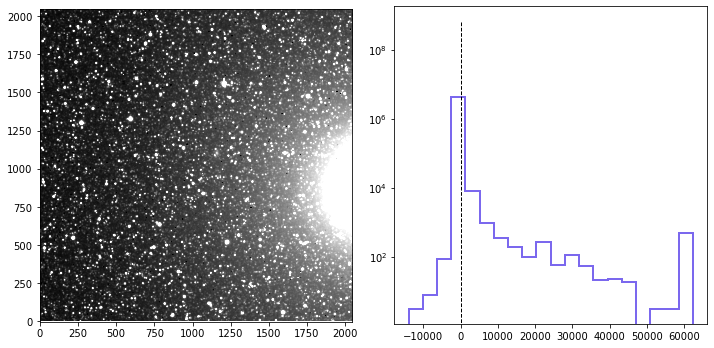

In [37]:
imshow(normal_sci2[0])

In [38]:
#########
# group 3
#########
raw_science3 = eazy_loader('group3/515632792050-00{}_14_.fit','group3/515632792050-0{}_14_.fit', 10)

In [39]:
# reduce group 3
normal_sci3 = reduce(raw_science3, master_dark, master_flat)

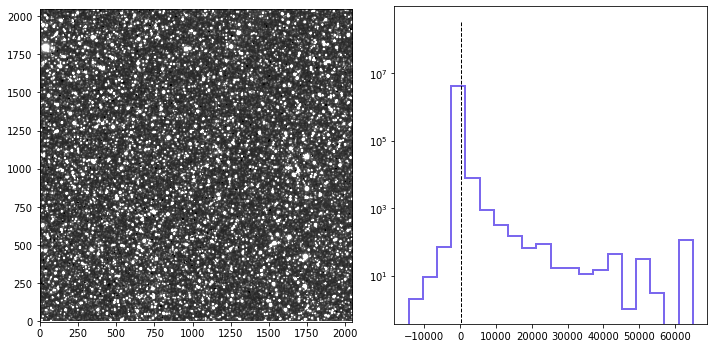

In [40]:
imshow(normal_sci3[0])

In [21]:
#########
# group 4
#########
raw_science4 = eazy_loader('group4/515906067435-00{}_14_.fit', 'group4/515906067435-0{}_14_.fit', 10)

In [22]:
# reduce group 4
normal_sci4 = reduce(raw_science4, master_dark, master_flat)

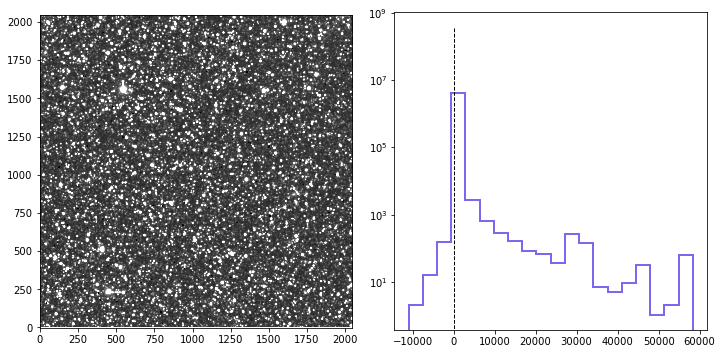

In [23]:
imshow(normal_sci4[0])

In [26]:
#########
# group 5
#########
raw_science5 = eazy_loader('group5/515928986848-00{}_14_.fit', 'group5/515928986848-0{}_14_.fit', 10)

In [27]:
# reduce group 5
normal_sci5 = reduce(raw_science5, master_dark, master_flat)

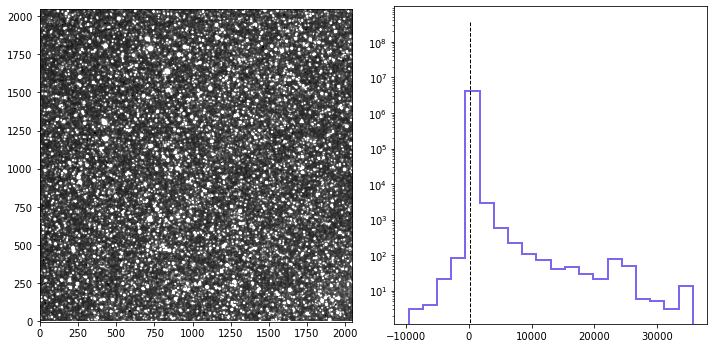

In [28]:
imshow(normal_sci5[0])

In [123]:
# save each normalized science frame
hdu = fits.PrimaryHDU(normal_sci5[9])
hdu.writeto('night1_g5_9.fits')